# An Analysis of Credibly Accused Clergy Data


The 1960's witnessed an increased awareness of the issue of child sexual abuse at the hands of clergymembers, a focus  sharpened by increased media reporting during the 1980's. (Anderson, 2015) The Pew Research Center has reported that about 9-in-10 adults have heard of clergy misconduct and believe that there is an ongoing problem in the Catholic church. In more recent decades, research studies have sought to empirically examine the spread of clergy abuse, in addition to its etiological factors. In January 2020, ProPublica released [two datasets](https://www.propublica.org/datastore/dataset/credibly-accused-priests) of 6,742 credibly accused clergymembers, including such info as names, dioceses, birth years, years of ordination, post-accusation clergy outcomes, and more. While these datasets are lacking in more detailed information, such as values on victim and specific incident, we can anaylze these sets for descriptive trends regarding the accused clergy and their dioceses.

In this project, we will focus on finding possible answers to the following questions:

- What trends can we find regarding clergy age?
- What clergy outcomes are most frequent?
- What dioceses are mentioned most frequently?
- Is there a relationship between accusation counts per diocese and their respective catholic population?

First, let's prep our datasets.

In [4]:
## Reading in the data.
import pandas as pd 
import numpy as np
from scipy import stats
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv("C:/Users/Summer .DESKTOP-5U4SV6A/Desktop/Scripts/Data sets/credibly-accused-clergymembers.csv", engine='python')
df2 = pd.read_csv("C:/Users/Summer .DESKTOP-5U4SV6A/Desktop/Scripts/Data sets/credibly-accused-diocese.csv", engine='python')

#Merging the datasets by diocese ID.
clergydata = pd.merge(df1, df2, left_on = "diocese_id", right_on = "id")

#A snapshot of the data.
clergydata.head(3)

,id_x,name_x,first_name,last_name,status,birth_date,ord_date,assignments,diocese_id,diocese_name,...,catholic_pop,state,released,database_count,date_of_release,diocese_link,current_leader,leader_title,installation_date,usccb
0,652690,Gerald Prinz,Gerald,Prinz,All priestly faculties permanently removed by ...,NaN,1968.0,"Served at Saint Francis de Sales in Houma, Sai...",2581.0,Diocese of Houma-Thibodaux,...,115360.0,Louisiana,True,14.0,Jan. 2019,https://htdiocese.org/disclosure-of-names,Shelton J. Fabre,Bishop,2013-10-30,True
1,652691,Gerard Kinane,Gerard,Kinane,All priestly faculties permanently removed wit...,NaN,1973.0,Served at Saint Hilary in Mathews,2581.0,Diocese of Houma-Thibodaux,...,115360.0,Louisiana,True,14.0,Jan. 2019,https://htdiocese.org/disclosure-of-names,Shelton J. Fabre,Bishop,2013-10-30,True
2,652692,Lawrence Cavell,Lawrence,Cavell,All priestly faculties permanently removed by ...,NaN,1989.0,"Served at Holy Cross in Morgan City, Sacred He...",2581.0,Diocese of Houma-Thibodaux,...,115360.0,Louisiana,True,14.0,Jan. 2019,https://htdiocese.org/disclosure-of-names,Shelton J. Fabre,Bishop,2013-10-30,True


In [5]:
#Printing last three rows
clergydata.tail(3)

,id_x,name_x,first_name,last_name,status,birth_date,ord_date,assignments,diocese_id,diocese_name,...,catholic_pop,state,released,database_count,date_of_release,diocese_link,current_leader,leader_title,installation_date,usccb
6739,652599,Raymond Prybis,Raymond,Prybis,Alive,NaN,NaN,"Saint Joseph, DALLASTOWN, OMI, 1989-1990",2578.0,Diocese of Harrisburg,...,245950.0,Pennsylvania,True,72.0,Aug. 2018,https://www.youthprotectionhbg.com/,Ronald W. Gainer,Bishop,2014-04-19,True
6740,652600,Patrick Shannon,Patrick,Shannon,Alive,NaN,NaN,"Saint Jude Thaddeus, MIFFLINTOWN, 1993-2005",2578.0,Diocese of Harrisburg,...,245950.0,Pennsylvania,True,72.0,Aug. 2018,https://www.youthprotectionhbg.com/,Ronald W. Gainer,Bishop,2014-04-19,True
6741,652601,James Shaughnessey,James,Shaughnessey,Deceased,NaN,NaN,"Saint Peter, COLUMBIA, 1941; Saint Joan of Arc...",2578.0,Diocese of Harrisburg,...,245950.0,Pennsylvania,True,72.0,Aug. 2018,https://www.youthprotectionhbg.com/,Ronald W. Gainer,Bishop,2014-04-19,True


In [5]:
#Calculating basic descriptive statistics
clergydata.describe()

,id_x,birth_date,ord_date,diocese_id,id_y,catholic_pop,database_count
count,6742.000000,1745.000000,3552.000000,6742.000000,6742.000000,6.051000e+03,6742.000000
mean,356653.567487,1932.491691,1960.663007,2572.117028,2572.117028,8.062532e+05,73.166123
std,301965.529495,16.267583,17.347328,65.494330,65.494330,1.069820e+06,74.593028
min,651.000000,1869.000000,1890.000000,2483.000000,2483.000000,1.000000e+04,2.000000
25%,65941.250000,1922.000000,1950.000000,2508.000000,2508.000000,1.751100e+05,31.000000
50%,651023.500000,1933.000000,1961.000000,2562.000000,2562.000000,3.745850e+05,49.000000
75%,652712.750000,1943.000000,1973.000000,2628.000000,2628.000000,8.787400e+05,83.000000
max,701230.000000,1985.000000,2017.000000,2701.000000,2701.000000,4.370290e+06,352.000000


#  Checking for Statistical Trends with Visual Representation

In total, the data contains the names and data of 6,742 clergymembers. In this next section, we will begin mining the dataset for answers to the following questions:

- Are there any trends regarding birth years and age at ordination?
- What were the outcomes for these clergy following their accusal?
- What are the twenty dioceses experiencing the highest rates of clergy accusations, according to this list?

We will start with the first question, beginning with plotting the distribution of birth years. 

## A. Examining Age Trends

Remaining rows of data: 1745
Percentage of data points remaining: 25.882527439928804


Text(0, 0.5, 'Number of Accused Clergy')

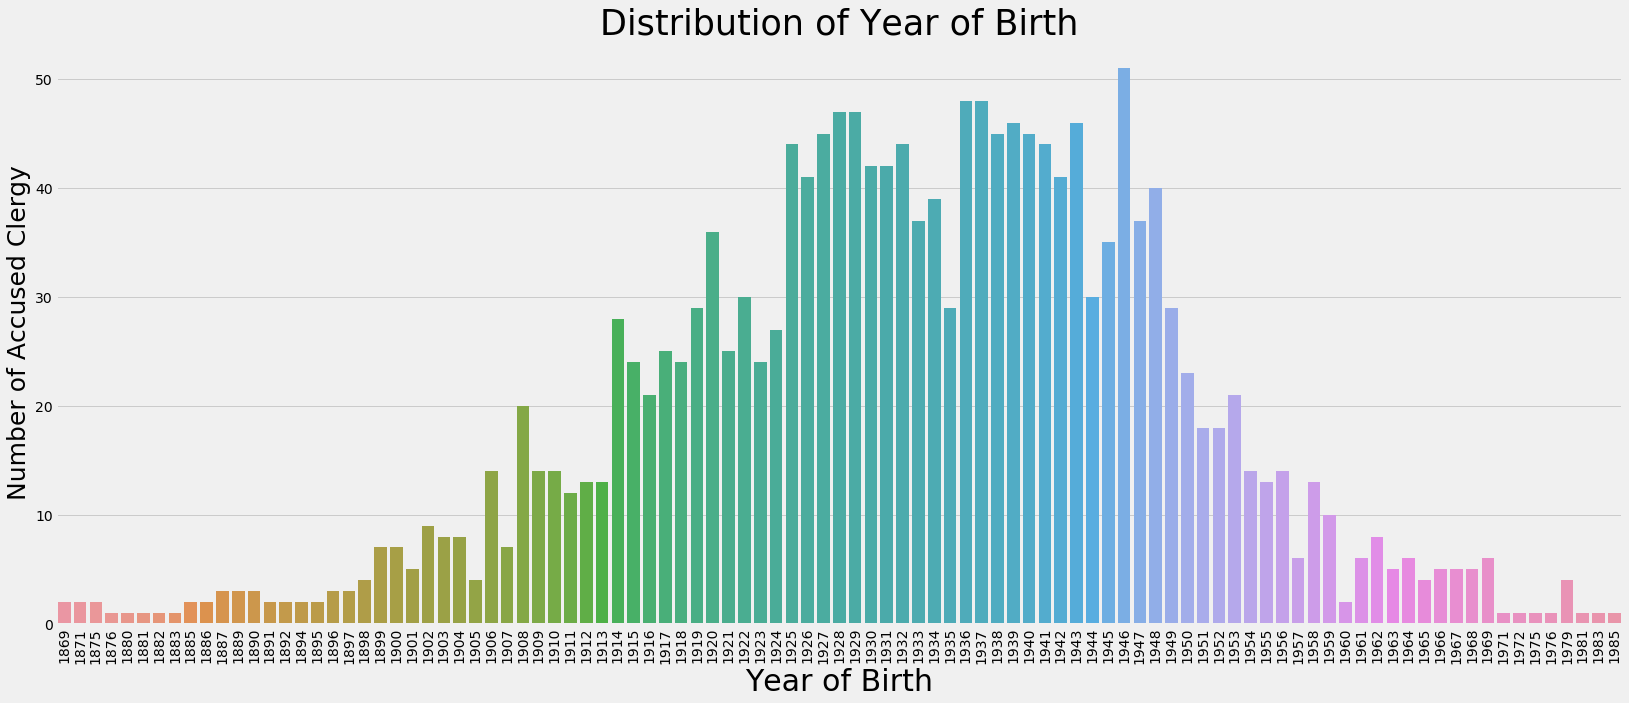

In [24]:
#Removing nulls
clergybirth_cleaned = clergydata['birth_date'].dropna(axis = 0, how ='any') 
print("Remaining rows of data: " + str(len(clergybirth_cleaned)))
print('Percentage of data points remaining: ' + str((int(len(clergybirth_cleaned))/(6742))*100))

#Plotting histogram
plt.style.use('fivethirtyeight')
plt.figure(figsize=(25,10))
sns.countplot(clergybirth_cleaned.astype(int))
plt.title("Distribution of Year of Birth", fontsize = 35)
plt.xlabel('Year of Birth', fontsize = 30)
plt.xticks(rotation = 90)
plt.ylabel('Number of Accused Clergy', fontsize = 25)

Unfortunately, we only have about 25% of data remaining with birth year, so we will be more limited in our ability to draw conclusions. With that disclaimer, it appears that the majority of accused clergy were born approximately within the range of 1915-1950. Whether this is due to a legitimate trend in increase in the birth of would-be offending clergy during this range or some alternative explanation is not something that can be ascertained via this particular dataset. While lack of records might account for the difference observed for years before the 1910's, this explanation is less satisfactory for the difference observed in latter birth years.

What might we observe if we plot the year of ordination in a similar manner?

Remaining rows of data: 3552
Percentage of data points remaining: 52.68466330465738


Text(0, 0.5, 'Number of Accused Clergy')

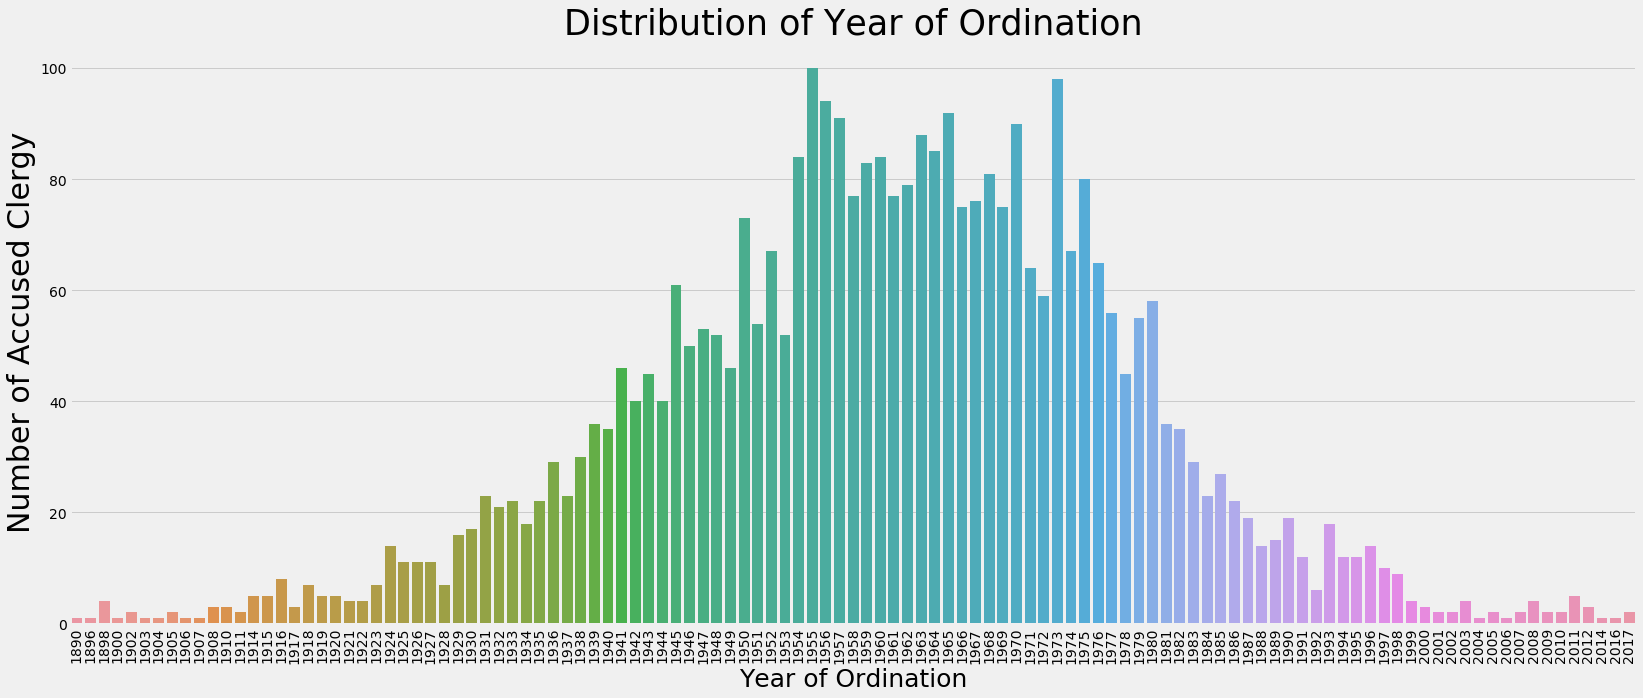

In [25]:
#Removing nulls
clergyord_cleaned = clergydata['ord_date'].dropna(axis = 0, how ='any') 
print("Remaining rows of data: " + str(len(clergyord_cleaned)))
print("Percentage of data points remaining: " + str((int(len(clergyord_cleaned))/(6742))*100))

#Plotting histogram
plt.style.use('fivethirtyeight')
plt.figure(figsize=(25,10))
sns.countplot(clergyord_cleaned.astype(int))
plt.title("Distribution of Year of Ordination", fontsize = 35)
plt.xlabel('Year of Ordination', fontsize = 25)
plt.xticks(fontsize = 14, rotation = 90)
plt.ylabel('Number of Accused Clergy', fontsize = 30)

This time, we had around 53% of the data to plot. With brief examination, it seems that the majority of accused clergy were ordained within the range of 1940-1980, particularly within the middle interceding decades. Keeping in mind our observations from the previous graph, we can guess that clergy are within their late '20s to early '30s when they achieve ordination. This graph parallels a finding made by the United States Conference of Catholic Bishops (USCCB), which stated that the "most abuse occurred between 1960 and 1990, with a peak in the 1970's;" in other words, there appears to be a relationship between the number of ordinations and rates of abuse incidents in the following years. (2018)

Let's calculate one final graph for this section that analyzes the distribution of age ranges.

In [26]:
#Adding age at ordination column 
clergydata.insert(7, 'Age at ordination', 'null') 
clergydata['Age at ordination'] = clergydata['ord_date'] - clergydata['birth_date']

In [27]:
#Creating column with age ranges for plotting viewability
clergydata.insert(8, 'Age range', 'null')

In [28]:
#Processing age data into ranges
bins = [0, 20, 23, 26, 30, 35, 40, 45, 50, 60, np.inf]
range_names = ['<20', '20-23', '24-26', '27-30', '31-35', '36-40', '41-45', '46-50', '51-60', '60+']

clergydata['Age range'] = pd.cut(clergydata['Age at ordination'], bins, labels = range_names)

#Removing null values for plot
clergyranges_cleaned = clergydata['Age range'].dropna(axis = 0, how ='any') 

print("Remaining rows of data: " + str(len(clergyranges_cleaned)))
print("Percentage of data points remaining: " + str((int(len(clergyranges_cleaned))/(6742))*100))

Remaining rows of data: 1676
Percentage of data points remaining: 24.85909225749036


We now have 25% of the total data remaining for plotting, which could be anticipated given the lower percentage of available birth year data. Creating the histogram is our final step.

Text(0, 0.5, 'Number of Clergy')

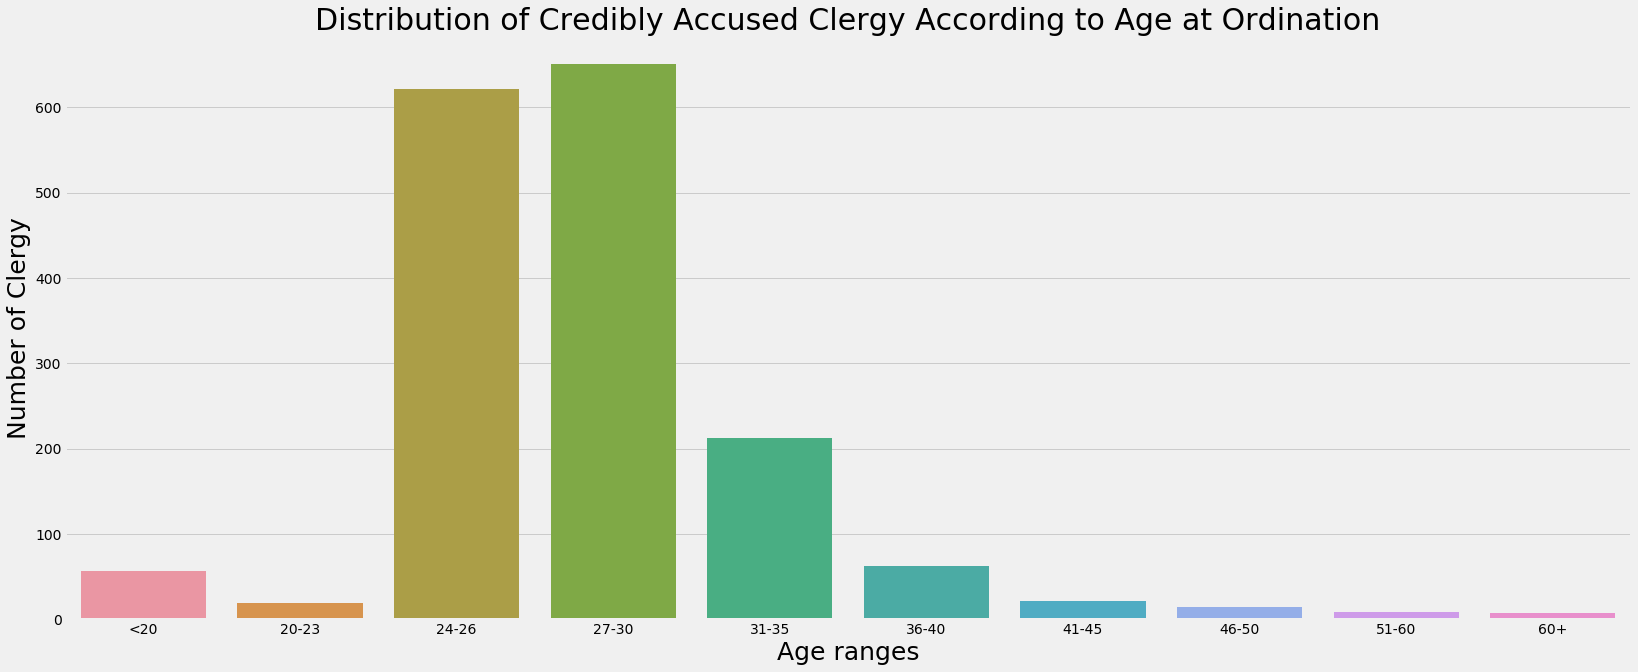

In [29]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(25,10))
sns.countplot(clergyranges_cleaned)
plt.title('Distribution of Credibly Accused Clergy According to Age at Ordination', fontsize = 30)
plt.xlabel('Age ranges', fontsize = 25)
plt.ylabel('Number of Clergy', fontsize = 25)

### Final Observations

This distribution presents an immediately noticeable trend, namely that - out of the remaining data points - the majority were ordained in their mid-to-late 20's, with early 30's being the next largest group. This generally supports our theory regarding typical age of ordination.

While extrapolating concrete conclusions from this data is inadvisable, one can posit that those clergymembers that pursued ordination much earlier or later in life are less likely to either abuse or face accusation with resulting public release of information.

Unfortunately, without data on the age of clergymembers during their supposed instances of abuse, further examination of clergy age trends will remain limited.

## B. Examining Post-Accusation Outcomes

A cursory examination of the dataset reveals that clergymembers experienced a variety of post-accusation outcomes. What specific outcomes were the most frequent or infrequent? Unfortunately, due to the lack of uniform variables for outcomes, detailed analysis of this subset is not within the confines of this project. However, we can peform a cursory examination of the most frequently mentioned outcomes to get a sense of broader trends. 

In [30]:
#Removing null values
clergyoutcomes_cleaned = clergydata['status'].dropna(axis = 0, how ='any') 
print('Number of remaining data rows: ' + str(len(clergyoutcomes_cleaned)))
print('Percentage of data points remaining: ' + str((int(len(clergyoutcomes_cleaned))/(6742))*100))

Number of remaining data rows: 6098
Percentage of data points remaining: 90.44793829724117


In [31]:
#Retrieving most frequent outcomes
print(clergyoutcomes_cleaned.str.lower().value_counts()[0:30])

deceased                                    2743
laicized                                     349
removed from ministry                        247
permanently removed from ministry            101
left archdiocese                              90
removed                                       73
unknown                                       63
living                                        40
alive                                         30
life of prayer and penance                    29
lay state                                     29
retired                                       24
dismissed                                     24
removed from active ministry                  23
convicted                                     21
inactive                                      21
former                                        21
believed to be alive                          20
removed from ministry; laicized               19
permanently removed from public ministry      18
removed from public 

According to this list, the most common outcomes as shown could be described as falling into the following general categories:

- Deceased
- Removed from clergy position, or laicized 
- Left former diocese
- Living or believed to be living
- Life of prayer and penance 
- Retired or inactive
- Convicted 
- Former clergymember
- Faculties restricted

Again, this aligns with the USCCB's (2018) finding that approximately 80% of alleged clergy offenders (identified between July 1, 2017 and June 30, 2018) were deceased, removed from their position, or laicized. 

## C. Examining Most Frequently Listed Dioceses

Since our dataset contains the respective diocese for each accused clergymember, let's examine whether any dioceses are mentioned more frequently than others. 

In [10]:
top20 = (clergydata['diocese_name'].value_counts()[0:20])
print(top20)

Archdiocese of Los Angeles                 352
Archdiocese of Boston                      171
Archdiocese of Baltimore                   142
Archdiocese of New York                    126
Diocese of Brooklyn                        121
Jesuits West                               111
Diocese of Pittsburgh                      108
Archdiocese of St. Paul and Minneapolis    104
Diocese of Buffalo                          97
Diocese of Erie                             94
Archdiocese of Detroit                      92
Diocese of San Jose                         86
Diocese of Scranton                         83
Diocese of Helena                           80
Archdiocese of Seattle                      79
Archdiocese of Santa Fe                     79
Archdiocese of Chicago                      78
Archdiocese of Philadelphia                 76
Diocese of Manchester                       73
Diocese of Harrisburg                       72
Name: diocese_name, dtype: int64


Unsurprisingly, several of the most populated cities/areas in the US appear at the top of this list. Let's plot this subset for a visual sense of scale.

Text(0, 0.5, 'Dioceses')

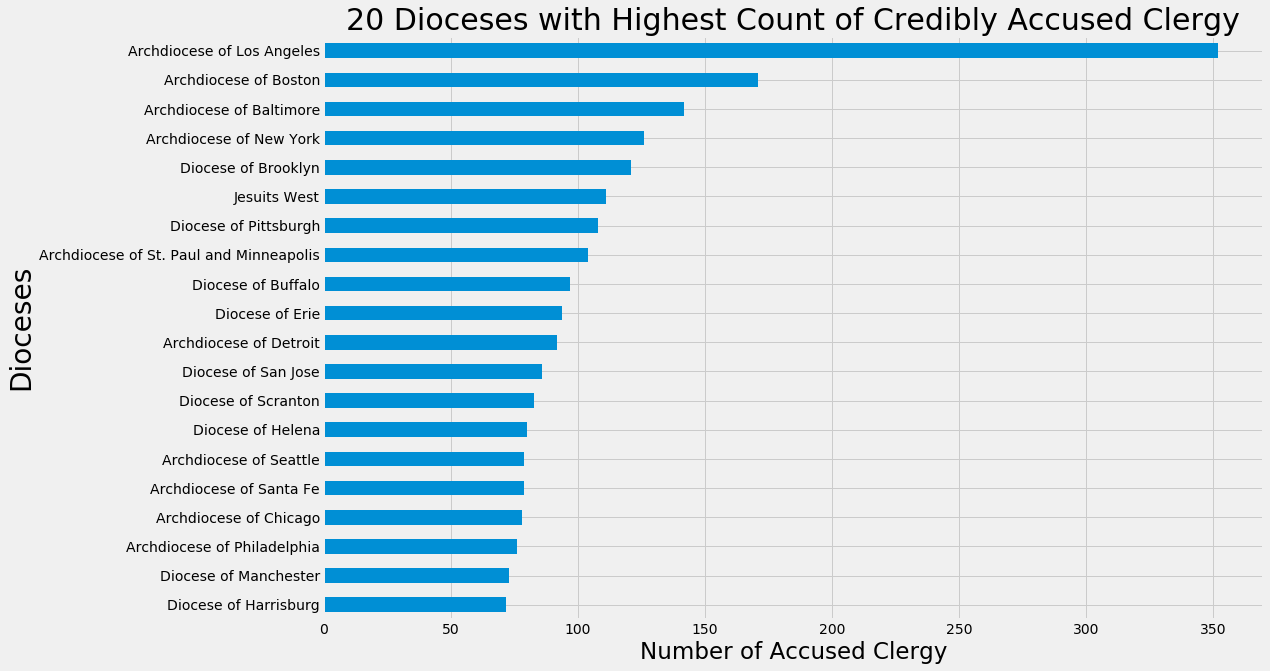

In [11]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
ax = top20.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("20 Dioceses with Highest Count of Credibly Accused Clergy", fontsize = 30)
plt.xlabel('Number of Accused Clergy', fontsize = 23)
plt.ylabel('Dioceses', fontsize = 28)

The Archdiocese of Los Angeles far outstrips the other dioceses. Due to Los Angeles' dense population, it is unsurprising that LA would exhibit a higher portion of accused clergy as compared to that of smaller cities. However, population difference doesn't account for the lower proportion observed in the combined Archdiocese of New York and Diocese of Brooklyn which collectively cover a population of approximately 10.6 million, far greater than that of Los Angeles.

What could account for this difference? One possible explanation lies within the ratio of Catholic population to general population; in this case, perhaps Los Angeles possesses a higher concentration of Catholics compared to New York. Fortunately, our dataset contains information on Catholic population for most dioceses.

As a note, population data is missing for Jesuits West, so further analysis will focus on the remaining top 19 dioceses.

In [12]:
LA = clergydata.loc[clergydata["diocese_name"] == "Archdiocese of Los Angeles", "catholic_pop"].unique()[0]
Boston = clergydata.loc[clergydata["diocese_name"] == "Archdiocese of Boston", "catholic_pop"].unique()[0]
Baltimore = clergydata.loc[clergydata["diocese_name"] == "Archdiocese of Baltimore", "catholic_pop"].unique()[0]
New_York = clergydata.loc[clergydata["diocese_name"] == "Archdiocese of New York", "catholic_pop"].unique()[0] 
Brooklyn = clergydata.loc[clergydata["diocese_name"] == "Diocese of Brooklyn", "catholic_pop"].unique()[0]
Pittsburgh = clergydata.loc[clergydata["diocese_name"] == "Diocese of Pittsburgh", "catholic_pop"].unique()[0]
Paul_Minneapolis = clergydata.loc[clergydata["diocese_name"] == "Archdiocese of St. Paul and Minneapolis", "catholic_pop"].unique()[0]
Buffalo = clergydata.loc[clergydata["diocese_name"] == "Diocese of Buffalo", "catholic_pop"].unique()[0]
Erie = clergydata.loc[clergydata["diocese_name"] == "Diocese of Erie", "catholic_pop"].unique()[0]
Detroit = clergydata.loc[clergydata["diocese_name"] == "Archdiocese of Detroit", "catholic_pop"].unique()[0]
San_Jose = clergydata.loc[clergydata["diocese_name"] == "Diocese of San Jose", "catholic_pop"].unique()[0]
Scranton = clergydata.loc[clergydata["diocese_name"] == "Diocese of Scranton", "catholic_pop"].unique()[0]
Helena = clergydata.loc[clergydata["diocese_name"] == "Diocese of Helena", "catholic_pop"].unique()[0]
Seattle = clergydata.loc[clergydata["diocese_name"] == "Archdiocese of Seattle", "catholic_pop"].unique()[0]
Santa_Fe = clergydata.loc[clergydata["diocese_name"] == "Archdiocese of Santa Fe", "catholic_pop"].unique()[0]
Chicago = clergydata.loc[clergydata["diocese_name"] == "Archdiocese of Chicago", "catholic_pop"].unique()[0]
Philadelphia = clergydata.loc[clergydata["diocese_name"] == "Archdiocese of Philadelphia", "catholic_pop"].unique()[0]
Manchester = clergydata.loc[clergydata["diocese_name"] == "Diocese of Manchester", "catholic_pop"].unique()[0]
Harrisburg = clergydata.loc[clergydata["diocese_name"] == "Diocese of Harrisburg", "catholic_pop"].unique()[0]

top19_cathpops = [LA, Boston, Baltimore, New_York, Brooklyn, Pittsburgh, Paul_Minneapolis, Buffalo, Erie, Detroit, San_Jose, Scranton, Helena, Seattle, Santa_Fe, Chicago, Philadelphia, Manchester, Harrisburg]
top19_dionames = ['Los Angeles', 'Boston', 'Baltimore', 'New York', 'Brooklyn', 'Pittsburg', 'St. Paul and Minneapolis', 'Buffalo', 'Erie', 'Detroit', 'San Jose', 'Scranton', 'Helena', 'Seattle', 'Santa Fe', 'Chicago', 'Philadelphia', 'Manchester', 'Harrisburg']

print(top19_cathpops)

[4370290.0, 1946413.0, 517015.0, 2782694.0, 1500000.0, 631659.0, 878740.0, 727125.0, 199779.0, 1123242.0, 635000.0, 278515.0, 45400.0, 863000.0, 329047.0, 2180000.0, 1429700.0, 326730.0, 245950.0]


Text(0, 0.5, 'Dioceses')

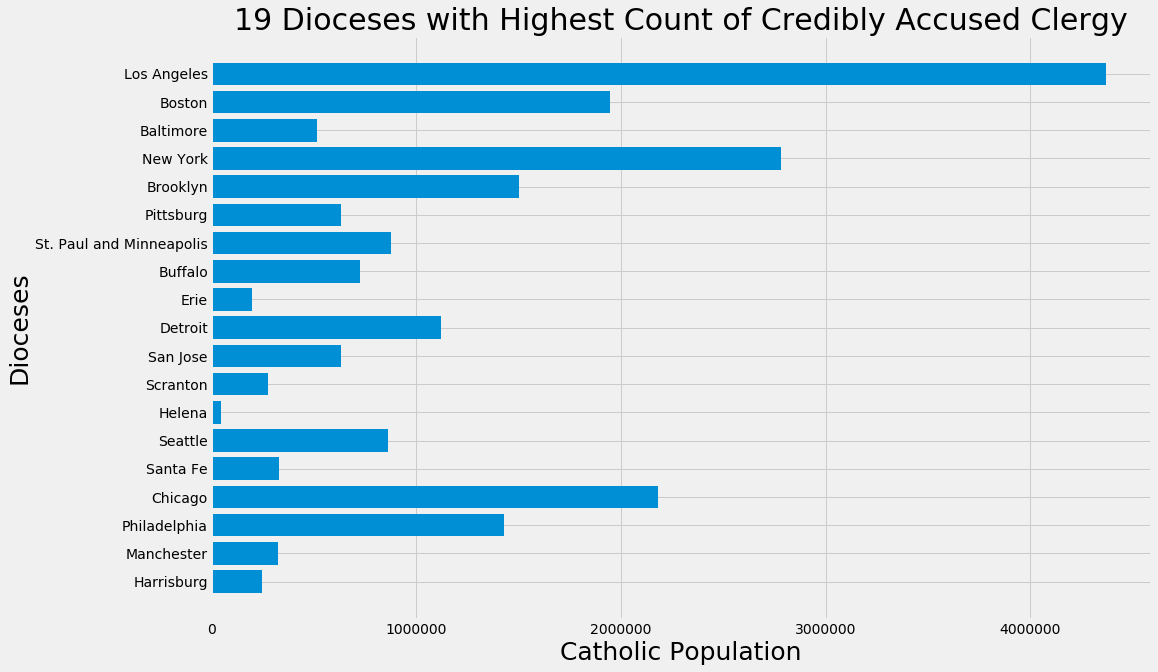

In [13]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
x=top19_dionames
y=top19_cathpops
plt.barh(x, y)
plt.gca().invert_yaxis()
plt.title("19 Dioceses with Highest Count of Credibly Accused Clergy", fontsize = 30)
plt.xlabel('Catholic Population', fontsize = 25)
plt.ylabel('Dioceses', fontsize = 25)

At a glance, the trend between total catholic population and total count of accusations is somewhat unclear. While Los Angeles and New York appear to demonstrate population proportions similar to the accusation count shown in the previous graph, Chicago's population far exceeds that of Santa Fe or Helena, despite their experiencing nearly the same number of accusations. 

As the final piece of this section, we will perform a simple linear regression analysis on these two data subsets to gain a better sense of their correlative relationship. 

In [19]:
#Extracting accusation counts
acc_counts = clergydata['diocese_name'].value_counts().tolist()[0:20]

#Removing Jesuits West value (null)
acc_counts.remove(111)

LinregressResult(slope=4.6576783436489343e-05, intercept=59.70567650216377, rvalue=0.7909761997929341, pvalue=5.5242104827852816e-05, stderr=8.738248547052612e-06)


Text(0, 0.5, 'Accusation Counts')

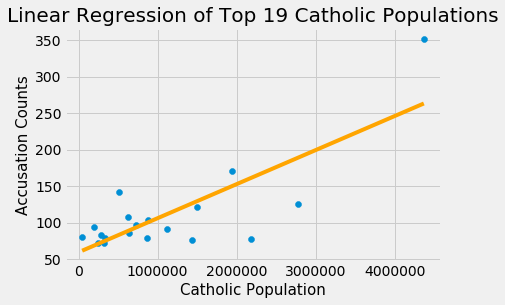

In [20]:
#Calculating linear regression
linreg = stats.linregress(top19_cathpops, acc_counts)
print(linreg)

#Creating linear regression plot
fig, ax = plt.subplots()
ax.scatter(top19_cathpops, acc_counts)
x_fit = np.linspace(np.min(top19_cathpops),np.max(top19_cathpops))
y_fit = x_fit * linreg[0] + linreg[1]
ax.plot(x_fit, y_fit, color = 'orange')
plt.title("Linear Regression of Top 19 Catholic Populations", fontsize = 20)
plt.xlabel('Catholic Population', fontsize = 15)
plt.ylabel('Accusation Counts', fontsize = 15)

### Final Observations

The results of the final graph indicate that there is a positive relationship between increased accusation counts and a higher catholic population, which supports the common sense assumption. These calculations provide a plausible answer for our earlier question regarding the higher proportion of accusations that the Los Angeles diocese has experienced compared to the New York City dioceses; while the New York dioceses contain a larger general population than that of Los Angeles, the latter contains a higher proportion of Catholics, and thus a higher proportion of accusations. Of course, this graph doesn't account for why certain cities with Catholic populations similar to that of other similarly sized cities experiece more accusations (like Chicago).

# Summary
While this dataset is not the most complete and broadly representative example of the various facets surrounding the issue of clergy abuse, it does contain some interesting insights. From this project, we were able to determine that:

- Most credibly accused clergymembers were within their late 20's or early 30's when they were ordained. 
- Most credibly accused clergymembers were ordained from approximately the 1950's to 1970's.
- Most frequent listed outcomes for the given accused clergy were "deceased", removed from their position, or laicized.
- There is a positive correlation between Catholic population and accusation counts. 

Ultimately, we are left with more questions than we can answer, and further studies should investigate where this dataset cannot. Some questions to ponder as we conclude this project:

- Why was there a particular rise in accusations in the mid-19th century, and why was there a sharp drop-off of accusations around the 1980's?
- In what context were incidents primarily taking place?
- By what means were incidents typically reported?
- Are there any demographic characteristics more frequently seen in credibly accused clergy and in their alleged victims?
- On a regional level, why do some cities experience higher accusation rates despite similarities in catholic populations with same-size cities that experience fewer accusations?

For information on advocacy efforts regarding this issue, visit the official website of [Ending Clergy Abuse](https://www.ecaglobal.org/).

### Further reading

Anderson, J. (2015). Comprehending and Rehabilitating Roman Catholic Clergy Offenders of Child Sexual Abuse. *Journal of Child Sexual Abuse*, 24(7), 772–795. doi: 10.1080/10538712.2015.1077367 

Churchill, L., Simani, E., & Sanders, T. (2020, January 28). Catholic Leaders Promised Transparency About Child Abuse. They... Retrieved from https://www.propublica.org/article/catholic-leaders-promised-transparency-about-child-abuse-they-havent-delivered 
    
Pew Research Center. (2020, May 5). Americans See Catholic Clergy Sex Abuse as an Ongoing Problem. Retrieved from https://www.pewforum.org/2019/06/11/americans-see-catholic-clergy-sex-abuse-as-an-ongoing-problem/ 

ProPublica. (2020, January 28). Credibly Accused Priests. Retrieved from https://www.propublica.org/datastore/dataset/credibly-accused-priests

Terry, K., Smith, M., Schuth, K., Kelly, J., Vollman, B., & Massey, C. (2011). United States Conference of Catholic Bishops. Retrieved from http://www.usccb.org/issues-and-action/child-and-youth-protection/upload/The-Causes-and-Context-of-Sexual-Abuse-of-Minors-by-Catholic-Priests-in-the-United-States-1950-2010.pdf 

United States Conference of Catholic Bishops. (2018). Audits. Retrieved May 7, 2020, from http://www.usccb.org/issues-and-action/child-and-youth-protection/audits.cfm 